In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Titanic.csv to Titanic (3).csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Titanic (3).csv']))
print(df)

     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#number of data points and number of features
#display rows and col
df.shape

(418, 12)

In [ ]:
#getting some information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
#checking the missing values from given dataset
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df['Age'] = df['Age'].fillna('nan')

print(len(df[df['Age'] == 'nan']['Age']))

86


In [ ]:

df['Embarked'] = df['Embarked'].fillna('nan')

print(len(df[df['Embarked'] == 'nan']['Embarked']))

0


In [ ]:
#filling missing values in the 'Cabin' column
df['Cabin'] = df['Cabin'].fillna('nan')

print(len(df[df['Cabin'] == 'nan']['Cabin']))

327


for handling missing values mean---> average mode----> more repeated value

Data Analysis

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,8.000000,9.000000,512.329200


Numerical feratures

In [ ]:
sns.set()

<ipython-input-108-0d6df46d78d7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


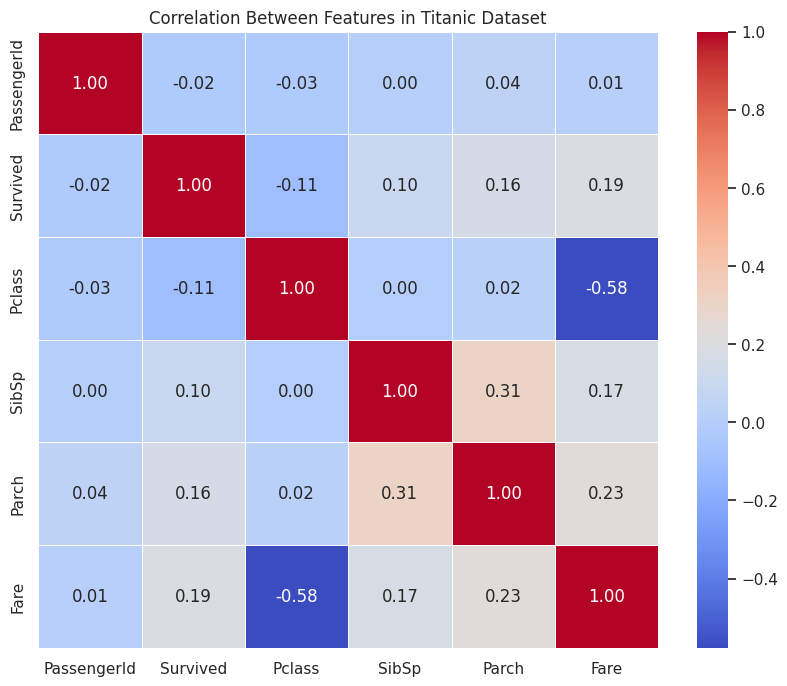

In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Between Features in Titanic Dataset')
plt.show()

 ‘Age’, ‘Sex’, ‘Fare’, ‘Embarked’ affect the chance of a passenger’s survival

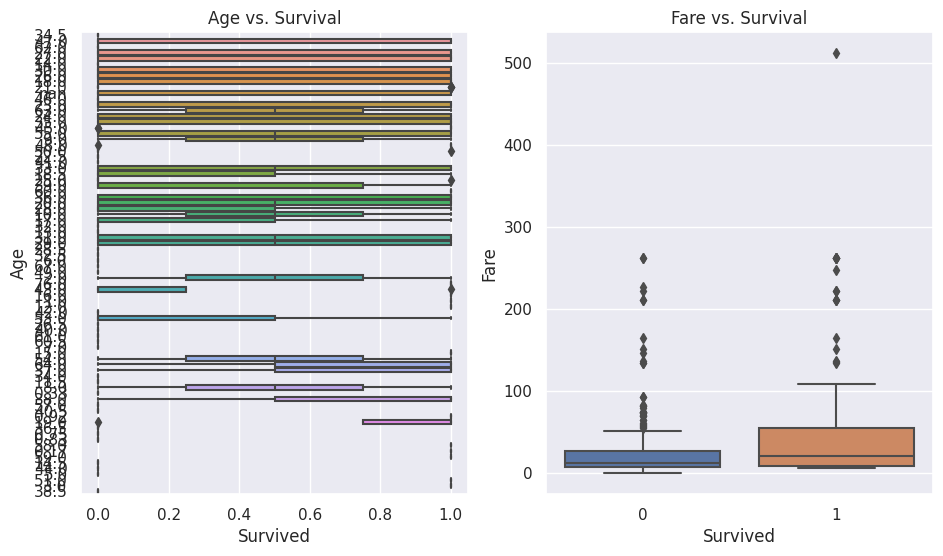

In [ ]:
# Set up the figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 6))

# Box plot for Age vs. Survival
sns.boxplot(x='Survived', y='Age', data=df, ax=axes[0])
axes[0].set_title('Age vs. Survival')

# Box plot for Fare vs. Survival
sns.boxplot(x='Survived', y='Fare', data=df, ax=axes[1])
axes[1].set_title('Fare vs. Survival')

plt.show()

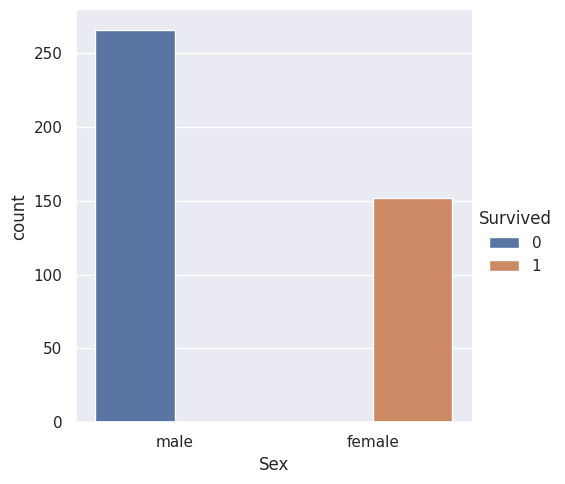

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = df)


<Axes: xlabel='Survived', ylabel='Pclass'>

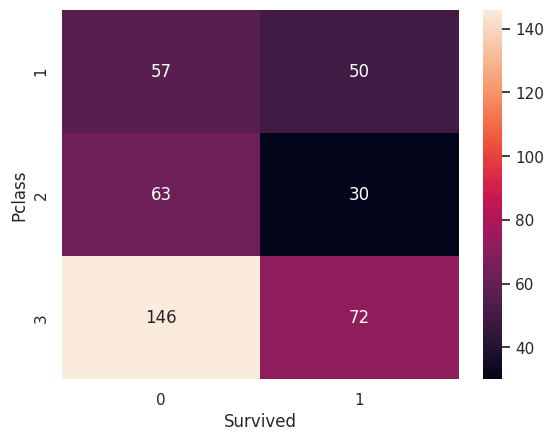

In [ ]:
# Group the dataset by Pclass and Survived and then unstack them
group = df.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()

# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")


<Axes: xlabel='Fare_Range', ylabel='Survived'>

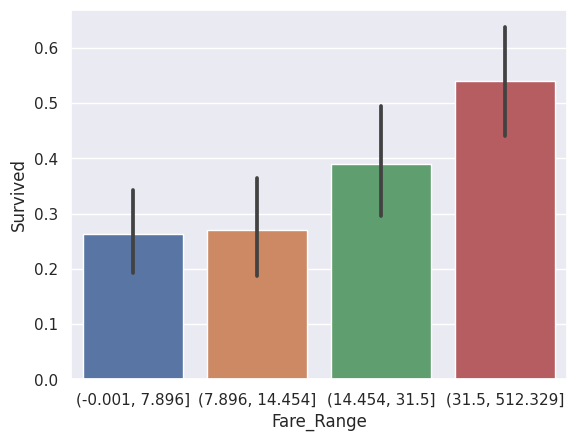

In [ ]:
# Divide Fare into 4 bins
df['Fare_Range'] = pd.qcut(df['Fare'], 4)

# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived',
data = df)
